###  $$ \underline{Exploratory   \ \  Data \ \ Analysis} $$

## AMEO 2015 
<h6>A dataset comprising AMCAT test scores,biodata details and employment outcomes of job seekers</h6>

## DATASET DESCRIPTION
For every engineer, it provides anonymized biodata information along with their respective skill scores and employment outcome information.
$ \ $    
<h6>Specifically, the following information is available for every engineer :</h6>
$ \ $    
<ol>
<li>Scores on Aspiring Minds’ AMCAT - a standardized
test of job skills. The test includes cognitive, domain
and personality assessments.</li>
$ \ $    
<li>Personal information like gender and date of birth.</li>
$ \ $       
<li>Pre-university information like 10th and 12th grade
marks, board of education and 12th grade graduation
year.</li>
 $ \ $      
<li>University information like GPA, college major,college
reputation proxy, graduation year and college location.</li>
 $ \ $      
<li>The following employment outcome information is available for every engineer :</li>
$ \ $       
<ul>
<li>First job annual salary</li>
    $ \ $    
<li>First job title</li>
    $ \ $    
<li>First job location</li>
    $ \ $    
<li>Date of joining and leaving of first job</li>
 </ul> </ul>


## Objective : 
<h6>
A relevant question is what determines the salary and the jobs these engineers are offered right after graduation.
 </h6>
<h6>The data can be used not only to make an accurate salary predictor but also to understand what influences salary . </h6>


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid", color_codes=True)
pd.set_option('precision', 3)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [83]:
data.shape

(3998, 34)

<h6>Number of Instances : 3998 ; 
Total Attributes : 39</h6>

In [5]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.636,445,-1,-1,-1,-1,-1,-1,0.974,0.813,0.527,1.355,-0.446
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.961,-1,466,-1,-1,-1,-1,-1,-0.734,0.379,1.240,-0.108,0.864
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.451,395,-1,-1,-1,-1,-1,-1,0.272,1.711,0.164,-0.868,0.672
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974,615,-1,-1,-1,-1,-1,-1,0.046,0.345,-0.344,-0.408,-0.919
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.125,-1,233,-1,-1,-1,-1,-1,-0.881,-0.279,-1.070,0.092,-0.130


#### Doing Some Feature Engineering Before Further Analysis To Make Analysis Easy

In [6]:
data.drop(columns=data.columns[0], axis=1, inplace=True)
data.set_index("ID",inplace=True)
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.636,445,-1,-1,-1,-1,-1,-1,0.974,0.813,0.527,1.355,-0.446
579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.961,-1,466,-1,-1,-1,-1,-1,-0.734,0.379,1.240,-0.108,0.864
810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.451,395,-1,-1,-1,-1,-1,-1,0.272,1.711,0.164,-0.868,0.672
267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974,615,-1,-1,-1,-1,-1,-1,0.046,0.345,-0.344,-0.408,-0.919
343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.125,-1,233,-1,-1,-1,-1,-1,-0.881,-0.279,-1.070,0.092,-0.130


In [7]:
#Retaining Only year from the DOB column.
data['DOB']=pd.to_datetime(data['DOB'])
data['Dyear']=data['DOB'].dt.year

data.drop(columns=['DOB'],axis=1,inplace=True)

#Replacing 12 Graduation Year With 12 Graduaton Age
data['12graduation']=pd.to_datetime(data['12graduation'])
data['12gyear']=data['12graduation'].dt.year
data['12GradAge']=abs(data['12gyear']-data['Dyear'])
data.drop(columns=['12graduation'],axis=1,inplace=True)

#Replacing Graduation Year With Graduaton Age
data['GraduationYear']=pd.to_datetime(data['GraduationYear'])
data['gyear']=data['GraduationYear'].dt.year
data['GradAge']=abs(data['gyear']-data['Dyear'])
data.drop(columns=['GraduationYear'],axis=1,inplace=True)

data['DOJ']=pd.to_datetime(data['DOJ'])
data['DOJyear']=data['DOJ'].dt.year
data['DOJAge']=abs(data['DOJyear']-data['Dyear'])
data.drop(columns=['DOJ'],axis=1,inplace=True)

In [8]:
#Dropping the collegeID,collegeCityID and previous created year columns since they are unnecessary for our analysis.
data.drop(columns=['CollegeID','CollegeCityID'],axis=1,inplace=True)
data.drop(columns=['12gyear', 'gyear','Dyear','DOJyear'],axis=1,inplace=True)

In [9]:
data['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [10]:
replace_list_state=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate', 'andhra pradesh state board',
       'up bord', 'gujarat board', 'intermideate']

In [11]:
#replacing the redundant values of the 12board column with 'state','cbse','icse' and 'NA'
for i in replace_list_state:
    data['12board'].replace(i,'State',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']

for i in replace_list_cbse:
    data['12board'].replace(i,'CBSE',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    data['12board'].replace(i,'ICSE',inplace=True)

data['12board'].replace(0,'NA',inplace=True)

data['12board'].unique()

array(['State', 'CBSE', 'ICSE', 'NA'], dtype=object)

In [12]:
data['Degree'].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [13]:
data['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [14]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

In [15]:
data['Specialization'] = data['Specialization'].map(specialization_map)
data['Specialization'].unique()

array(['CS', 'EC', 'ME', 'EL', 'CE', 'other'], dtype=object)

## EDA - Statastical :

In [82]:
data.shape

(3998, 34)

<h6>Number of Instances : 3998 ; 
Total Attributes After Feature Engineering: 39</h6>

In [16]:
data.describe()

,Salary,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,12GradAge,GradAge,DOJAge
count,3.998e+03,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000
mean,3.077e+05,77.925,74.466,1.926,71.486,0.300,501.649,501.599,513.378,0.510,353.103,95.328,90.742,22.975,16.479,31.851,2.684,-0.038,0.146,0.003,-0.169,-0.138,20.427,20.427,22.611
std,2.127e+05,9.850,11.000,0.262,8.167,0.458,104.940,86.783,122.302,0.469,205.356,158.241,175.273,98.123,87.586,104.853,36.659,1.029,0.942,0.951,1.008,1.008,1.767,1.767,1.360
min,3.500e+04,43.000,40.000,1.000,6.450,0.000,180.000,195.000,120.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-4.127,-5.782,-4.601,-2.643,-7.376,7.000,7.000,0.000
25%,1.800e+05,71.680,66.000,2.000,66.407,0.000,425.000,445.000,430.000,0.342,295.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.714,-0.287,-0.605,-0.868,-0.669,19.000,19.000,22.000
50%,3.000e+05,79.150,74.400,2.000,71.720,0.000,500.000,505.000,515.000,0.623,415.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.046,0.212,0.091,-0.234,-0.094,21.000,21.000,22.000
75%,3.700e+05,85.670,82.600,2.000,76.328,1.000,570.000,565.000,595.000,0.842,495.000,233.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.703,0.813,0.672,0.526,0.502,22.000,22.000,23.000
max,4.000e+06,97.760,98.700,2.000,99.930,1.000,875.000,795.000,900.000,1.000,840.000,612.000,715.000,623.000,676.000,548.000,516.000,1.995,1.905,2.535,3.353,1.822,27.000,27.000,32.000


In [85]:
data.describe(include='object')

,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
count,3998,3998,3998,3998,3998,3998,3998,3998,3998
unique,67,419,339,2,275,4,4,6,26
top,present,software engineer,Bangalore,m,cbse,State,B.Tech/B.E.,CS,Uttar Pradesh
freq,1875,539,627,3041,1395,2058,3700,2289,915


<h6>Observations : </h6>
<ul>
    <li>Most Of the Job Holders are Software Engneers</li>
    <li>Most Of the employee's are in Bangalore</li>
    <li>Most of the Job Holders has done B.Tech With Specialization</li>
    
Funny Note : Tried of listening these 3 things right from my graduation but finally found a proof

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 203097 to 324966
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   int64  
 1   DOL                    3998 non-null   object 
 2   Designation            3998 non-null   object 
 3   JobCity                3998 non-null   object 
 4   Gender                 3998 non-null   object 
 5   10percentage           3998 non-null   float64
 6   10board                3998 non-null   object 
 7   12percentage           3998 non-null   float64
 8   12board                3998 non-null   object 
 9   CollegeTier            3998 non-null   int64  
 10  Degree                 3998 non-null   object 
 11  Specialization         3998 non-null   object 
 12  collegeGPA             3998 non-null   float64
 13  CollegeCityTier        3998 non-null   int64  
 14  CollegeState           3998 non-null   object 
 1

<h6>From 37 features, 2 are DateTime , 26 are Numerical  ,9 are Categorical</h6>

<h6>From Info We Can Observe That There No Null Values But According To Missing Values are Given By - 1</h6>

In [18]:
data.isin([-1, 'NaN']).sum() #finding number of null values

Salary                      0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
10percentage                0
10board                     0
12percentage                0
12board                     0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityTier             0
CollegeState                0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
12GradAge                   0
GradAge                     0
DOJAge    

<li>We Can Observe <b>461</b> Missing Values in JobCity </li>
<li>As Domains are  optional sections for the candidates.
 <li>Those opting out of it get a score of -1 so we may not consider them missing values</li>

In [20]:
#Unquie Values
data.apply(lambda x : len(x.unique()))

Salary                    177
DOL                        67
Designation               419
JobCity                   339
Gender                      2
10percentage              851
10board                   275
12percentage              801
12board                     4
CollegeTier                 2
Degree                      4
Specialization              6
collegeGPA               1282
CollegeCityTier             2
CollegeState               26
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg                  23
conscientiousness         141
agreeableness             149
extraversion              154
nueroticism               217
openess_to_experience     142
12GradAge                  17
GradAge                    17
DOJAge    

In [21]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())


Frequency of Categories for varible DOL
present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
                       ... 
2011-08-01 00:00:00       1
2010-02-01 00:00:00       1
2010-10-01 00:00:00       1
2015-10-01 00:00:00       1
2008-03-01 00:00:00       1
Name: DOL, Length: 67, dtype: int64

Frequency of Categories for varible Designation
software engineer         539
software developer        265
system engineer           205
programmer analyst        139
systems engineer          118
                         ... 
junior manager              1
project administrator       1
r & d                       1
teradata dba                1
senior research fellow      1
Name: Designation, Length: 419, dtype: int64

Frequency of Categories for varible JobCity
Bangalore        627
-1               461
Noida            368
Hyderabad        335
Pune             290
                ... 
Sahibabad          1

In [86]:
numeric_features = data.select_dtypes(include=[np.number])

catagorical_features = data.select_dtypes(include=[np.object])

print(numeric_features.columns)
print(' ')
print(catagorical_features.columns)

Index(['Salary', '10percentage', '12percentage', 'CollegeTier', 'collegeGPA',
       'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', '12GradAge', 'GradAge', 'DOJAge'],
      dtype='object')
 
Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')


In [24]:
#Filtering out useful featues for analysis 

category_list=[ 'Gender', '12board', 'Degree','Specialization'
        ]

numeric_list=[ 'Salary','10percentage', '12percentage', 'collegeGPA',
        'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ComputerScience', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', '12GradAge',
       'GradAge']

## EDA - Visuvilazation :

## Univariate Analysis

<h4>Numerical Variables</h4>

<h6>Understanding the probability and frequency distribution of each numerical column using hist and dist plots</h6>

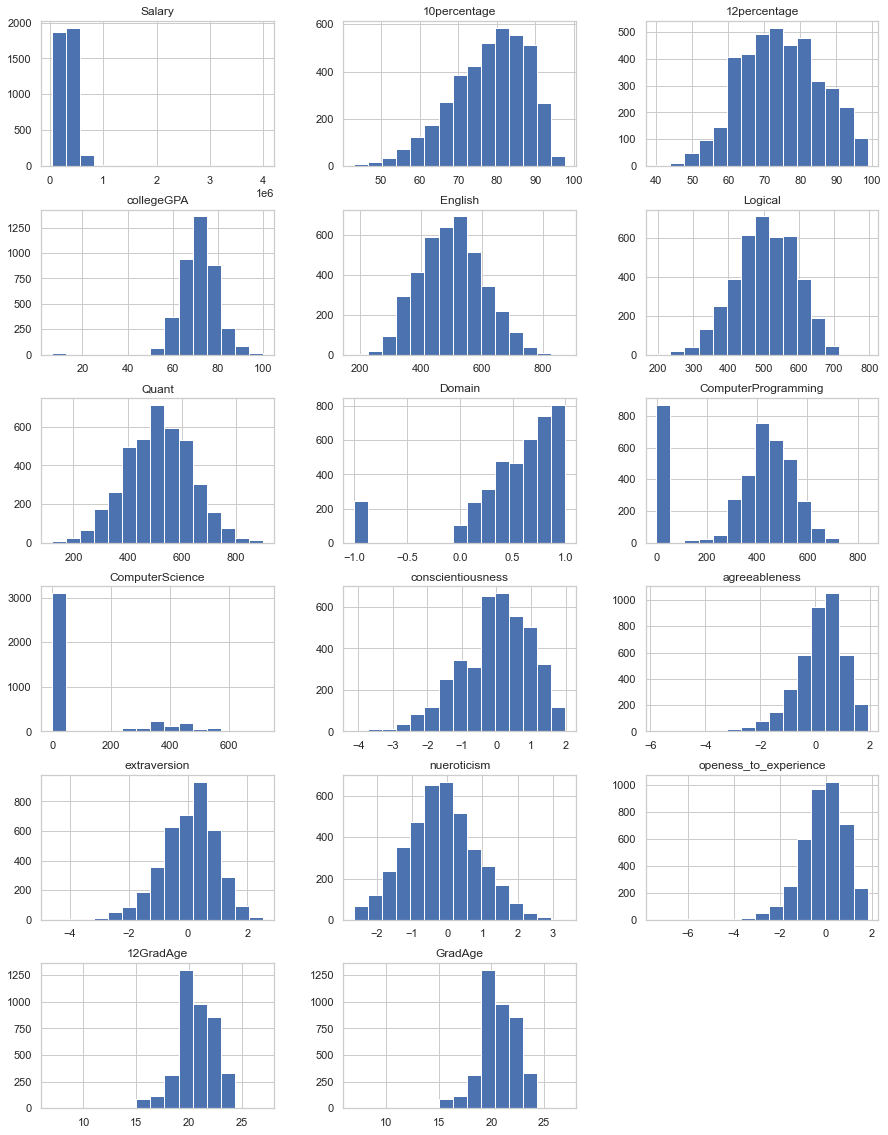

In [87]:
data[numeric_list].hist(bins=15, figsize=(15, 20), layout=(6, 3));

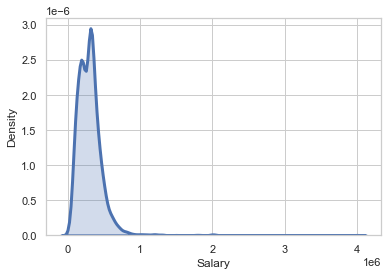

In [88]:
sns.distplot(data['Salary'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Salary');

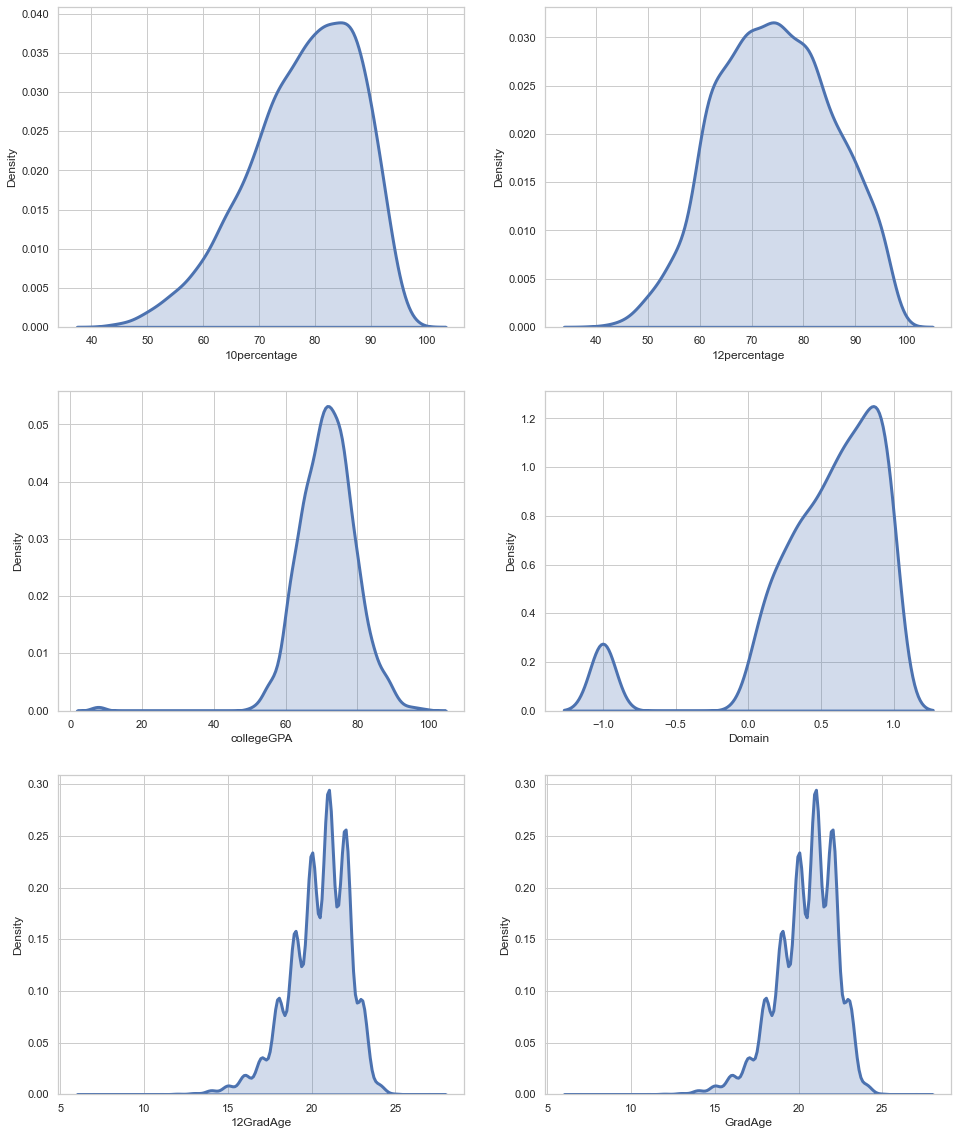

In [89]:
plt.figure(figsize=(16,20))


plt.subplot(3,2,1)
sns.distplot(data['10percentage'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3});


plt.subplot(3,2,2)
sns.distplot(data['12percentage'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3});


plt.subplot(3,2,3)
sns.distplot(data['collegeGPA'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3});


plt.subplot(3,2,6)
sns.distplot(data['GradAge'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3},);

plt.subplot(3,2,5)
sns.distplot(data['12GradAge'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3},);

plt.subplot(3,2,4)
sns.distplot(data['Domain'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3},);


plt.show()

<ul>
    <li>We Observe a Normal Distribution in 12Percentage </li>
    <li>Pareto distribution in CollegeGPA</li>
    <li>And Uneven Distributions In Remaining coloumns</li>

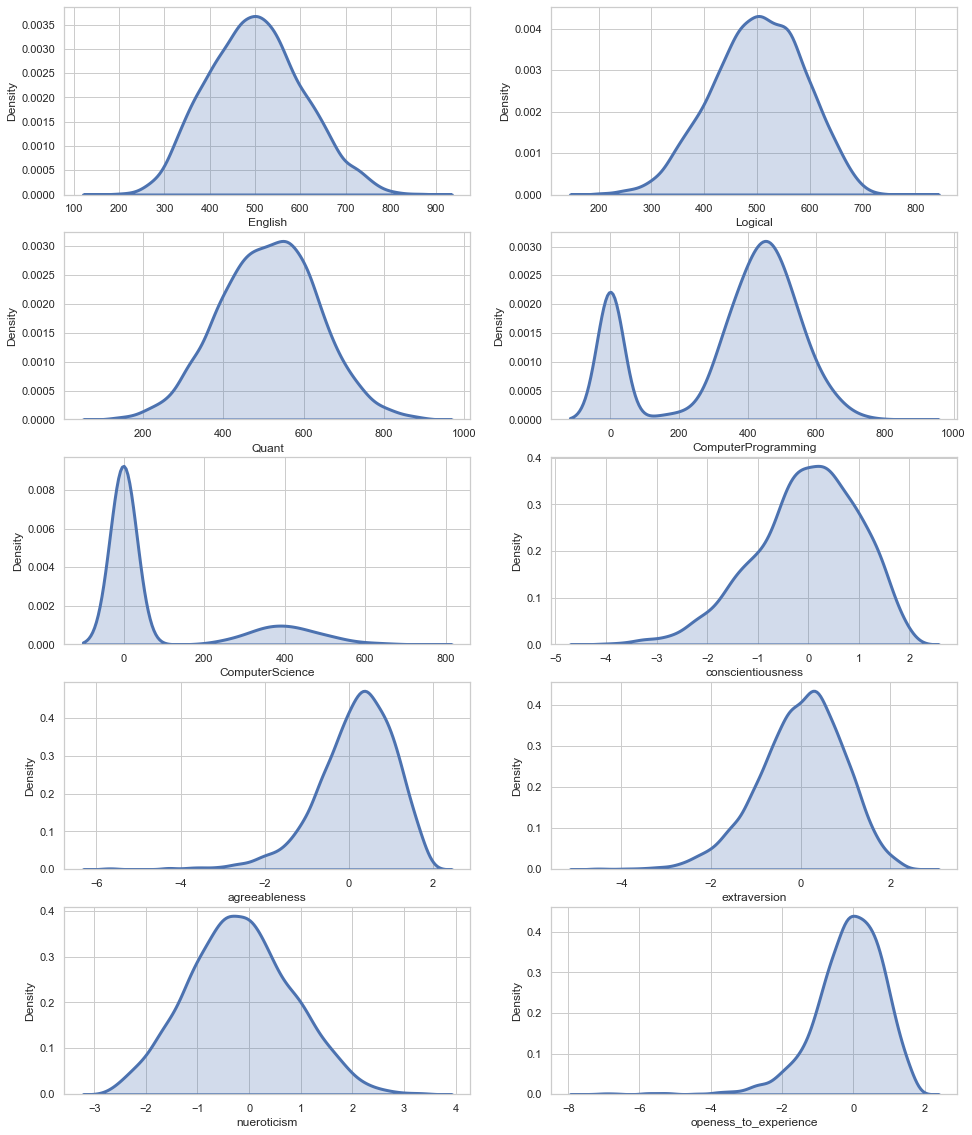

In [90]:
#Distributions of  AMCAT's Modlues

plt.figure(figsize=(16,20))


plt.subplot(5,2,1)
sns.distplot(data['English'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3});


plt.subplot(5,2,2)
sns.distplot(data['Logical'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3});


plt.subplot(5,2,3)
sns.distplot(data['Quant'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3});


plt.subplot(5,2,4)
sns.distplot(data['ComputerProgramming'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3},);

plt.subplot(5,2,5)
sns.distplot(data['ComputerScience'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3},);

plt.subplot(5,2,6)
sns.distplot(data['conscientiousness'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3},);

plt.subplot(5,2,7)
sns.distplot(data['agreeableness'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3});


plt.subplot(5,2,8)
sns.distplot(data['extraversion'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3},);

plt.subplot(5,2,9)
sns.distplot(data['nueroticism'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3},);

plt.subplot(5,2,10)
sns.distplot(data['openess_to_experience'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3},);

plt.show()

<h6>We Can Almost find a Normal distribution in each of AMCAT's Modules</h6>

<h6>Finding the outliers in each numerical column using BOXPlots</h6>

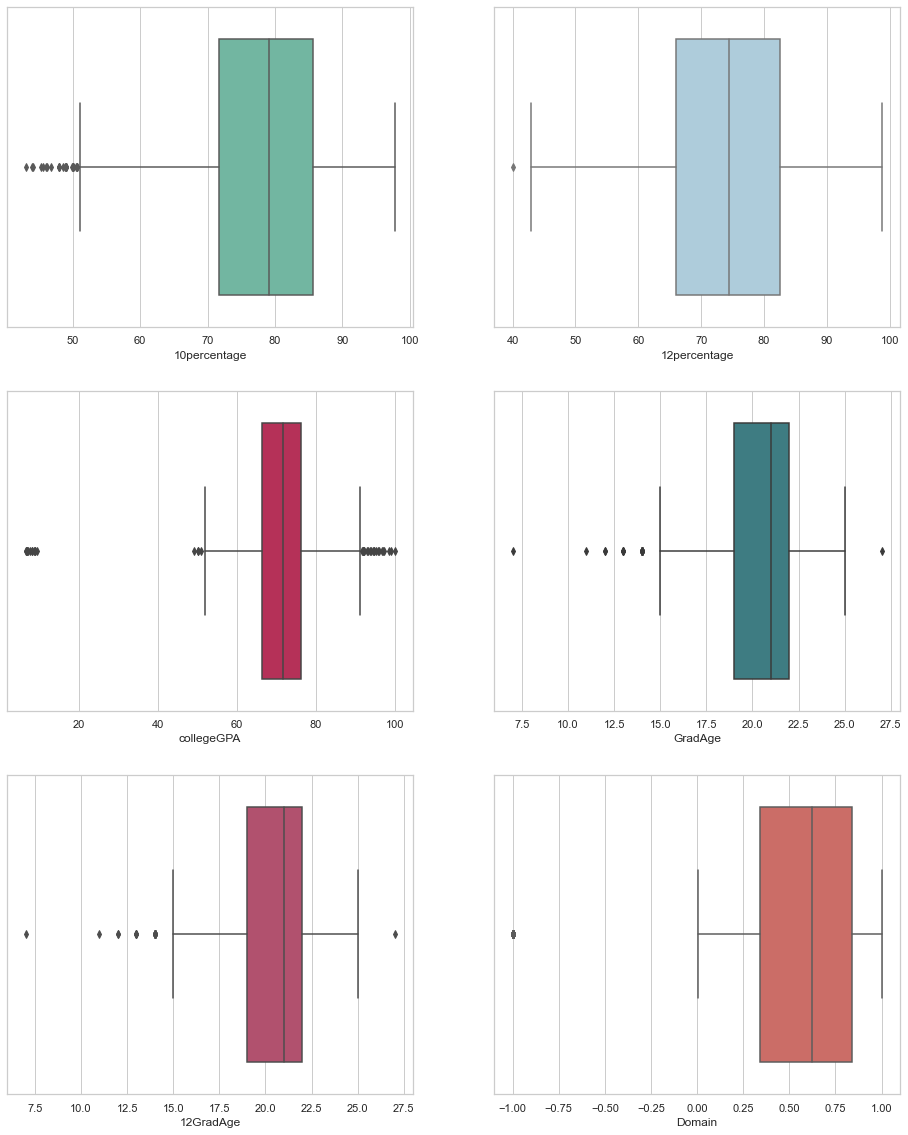

In [91]:
plt.figure(figsize=(16,20))


plt.subplot(3,2,1)
sns.boxplot(data['10percentage'],palette="Set2");


plt.subplot(3,2,2)
sns.boxplot(data['12percentage'],palette='Paired');


plt.subplot(3,2,3)
sns.boxplot(data['collegeGPA'],palette='rocket');


plt.subplot(3,2,4)
sns.boxplot(data['GradAge'],palette='crest');

plt.subplot(3,2,5)
sns.boxplot(data['12GradAge'],palette='flare');

plt.subplot(3,2,6)
sns.boxplot(data['Domain'],palette='hls');


plt.show()

<h6>We can most of the outliers in the College GPA which represents people whose score is average secured more jobs </h6>
 Funny Note : Average Students / Middle Benchers always rocks 

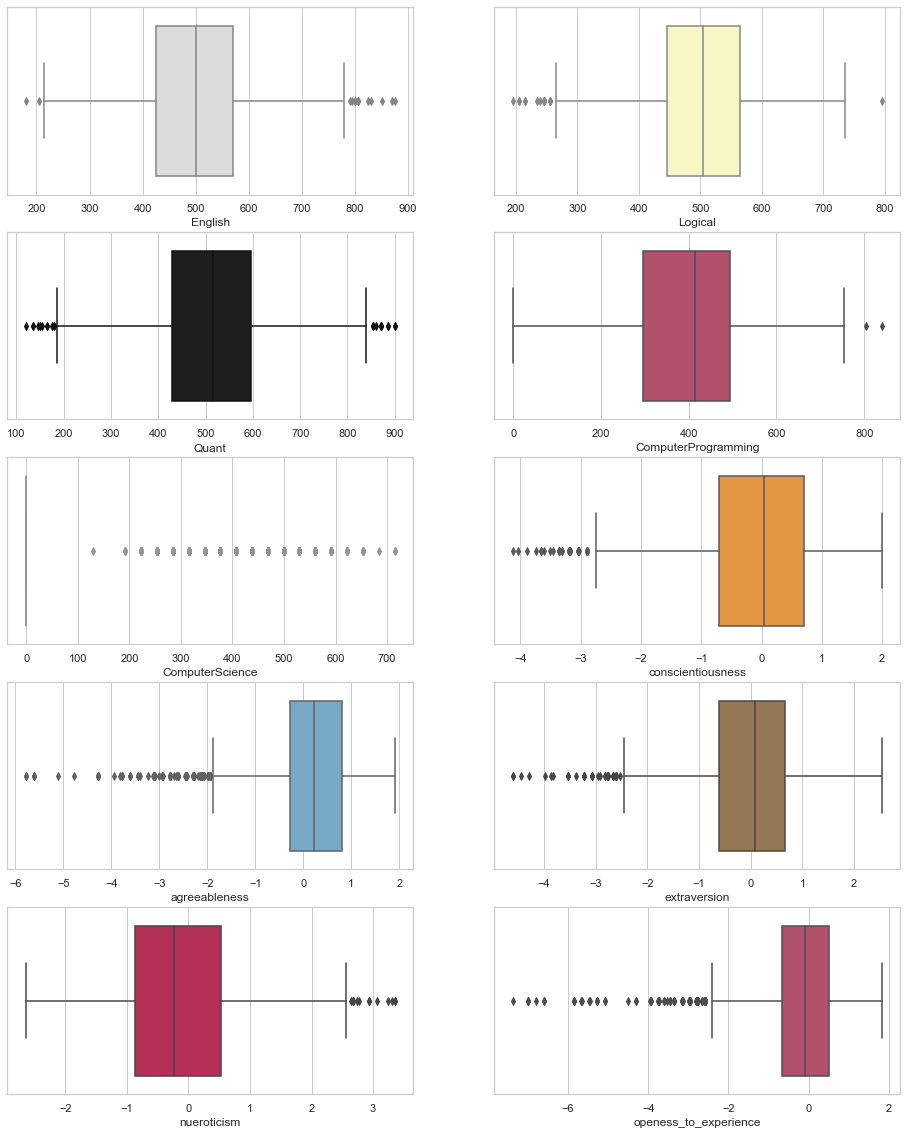

In [92]:
plt.figure(figsize=(16,20))


plt.subplot(5,2,1)
sns.boxplot(data['English'],palette='coolwarm');


plt.subplot(5,2,2)
sns.boxplot(data['Logical'],palette='Spectral');


plt.subplot(5,2,3)
sns.boxplot(data['Quant'],palette='icefire');


plt.subplot(5,2,4)
sns.boxplot(data['ComputerProgramming'],palette='flare');

plt.subplot(5,2,5)
sns.boxplot(data['ComputerScience'],palette='vlag');

plt.subplot(5,2,6)
sns.boxplot(data['conscientiousness'],palette='YlOrBr');

plt.subplot(5,2,7)
sns.boxplot(data['agreeableness'],palette='Blues');


plt.subplot(5,2,8)
sns.boxplot(data['extraversion'],palette='cubehelix');

plt.subplot(5,2,9)
sns.boxplot(data['nueroticism'],palette='rocket_r');

plt.subplot(5,2,10)
sns.boxplot(data['openess_to_experience'],palette='flare');

plt.show()

<h6>There is Presence of outliers in every feature</h6>

<h4>Categorical Variables</h4>

<h6>Understanding the frequency distribution of each categorical Variable/Column using Count Plots</h6>

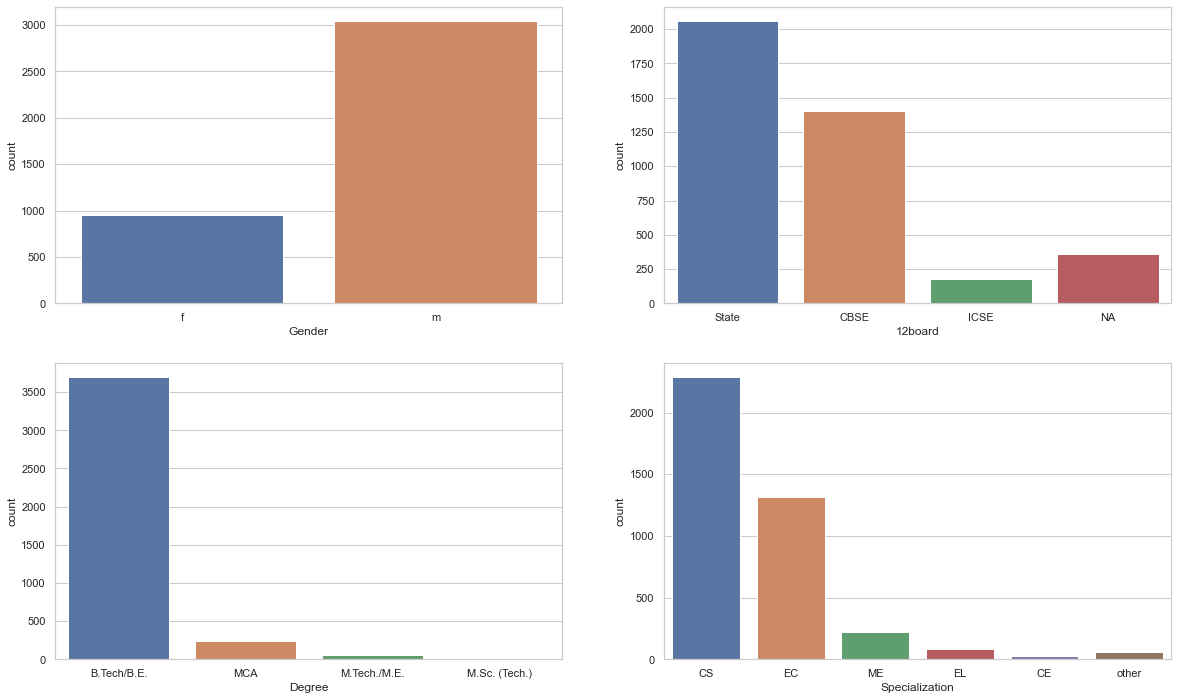

In [93]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
for variable, subplot in zip(category_list, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    #for label in subplot.get_xticklabels():
        #label.set_rotation(90)

<h6>Observations : </h6>
<ul>
    <li>Male are in more number comapred to female</li>
    <li>Most of the students have completed their intermediate in  State Board</li>
    <li>Persons who have done Btech in CS has more opportunities to get a job</li>

## Bivariate Analysis 

<h6>Relationships Between Numerical Columns Using hexbin plots</h6>

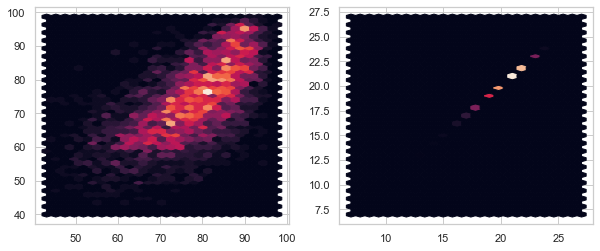

In [94]:
plt.figure(figsize=(10,4))


plt.subplot(1,2,1)
plt.hexbin(data['10percentage'], data['12percentage'], gridsize=(25,25));


plt.subplot(1,2,2)
plt.hexbin(data['GradAge'], data['12GradAge'], gridsize=(25,25));

plt.show()

<li>Their is linear corealtion between 1 & 12 percentage which means most of  students who have performed well in 10 also performed well in 12th</li>

<h6>Relationships Between Numerical Columns Using Scatter plots</h6>

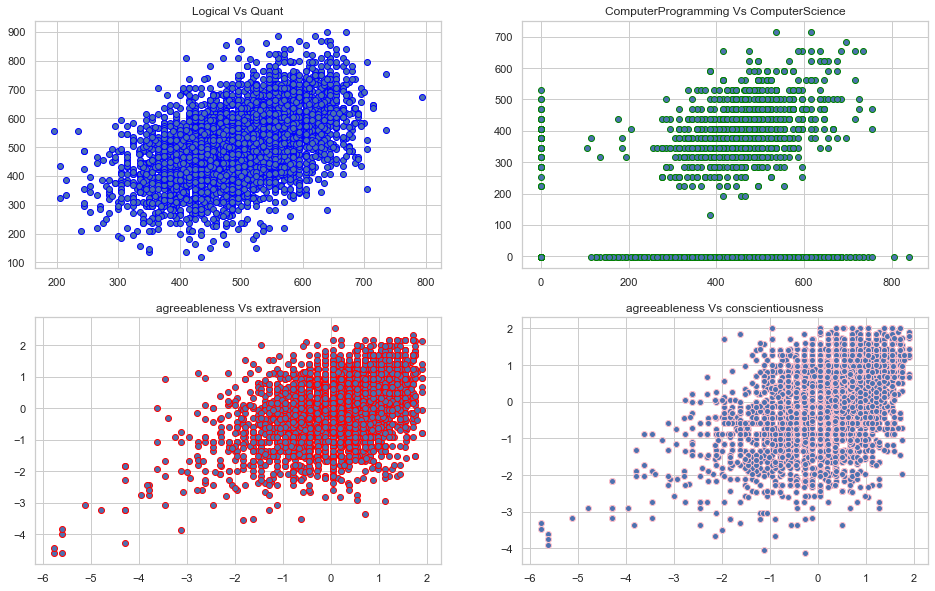

In [95]:
plt.figure(figsize=(16,10))


plt.subplot(2,2,1)
plt.scatter(data['Logical'],data['Quant'], edgecolors='blue')
plt.title('Logical Vs Quant');


plt.subplot(2,2,2)
plt.scatter(data['ComputerProgramming'],data['ComputerScience'], edgecolors='green')
plt.title('ComputerProgramming Vs ComputerScience');


plt.subplot(2,2,3)
plt.scatter(data['agreeableness'],data['extraversion'], edgecolors='red')
plt.title('agreeableness Vs extraversion');

plt.subplot(2,2,4)
plt.scatter(data['agreeableness'],data['conscientiousness'], edgecolors='pink')
plt.title('agreeableness Vs conscientiousness');


plt.show()

<h6>Their is linear realtion between AMCAT's Modules which means students who are good in all modules </h6>

<h6>Relationships between numerical columns using  pair plots </h6>

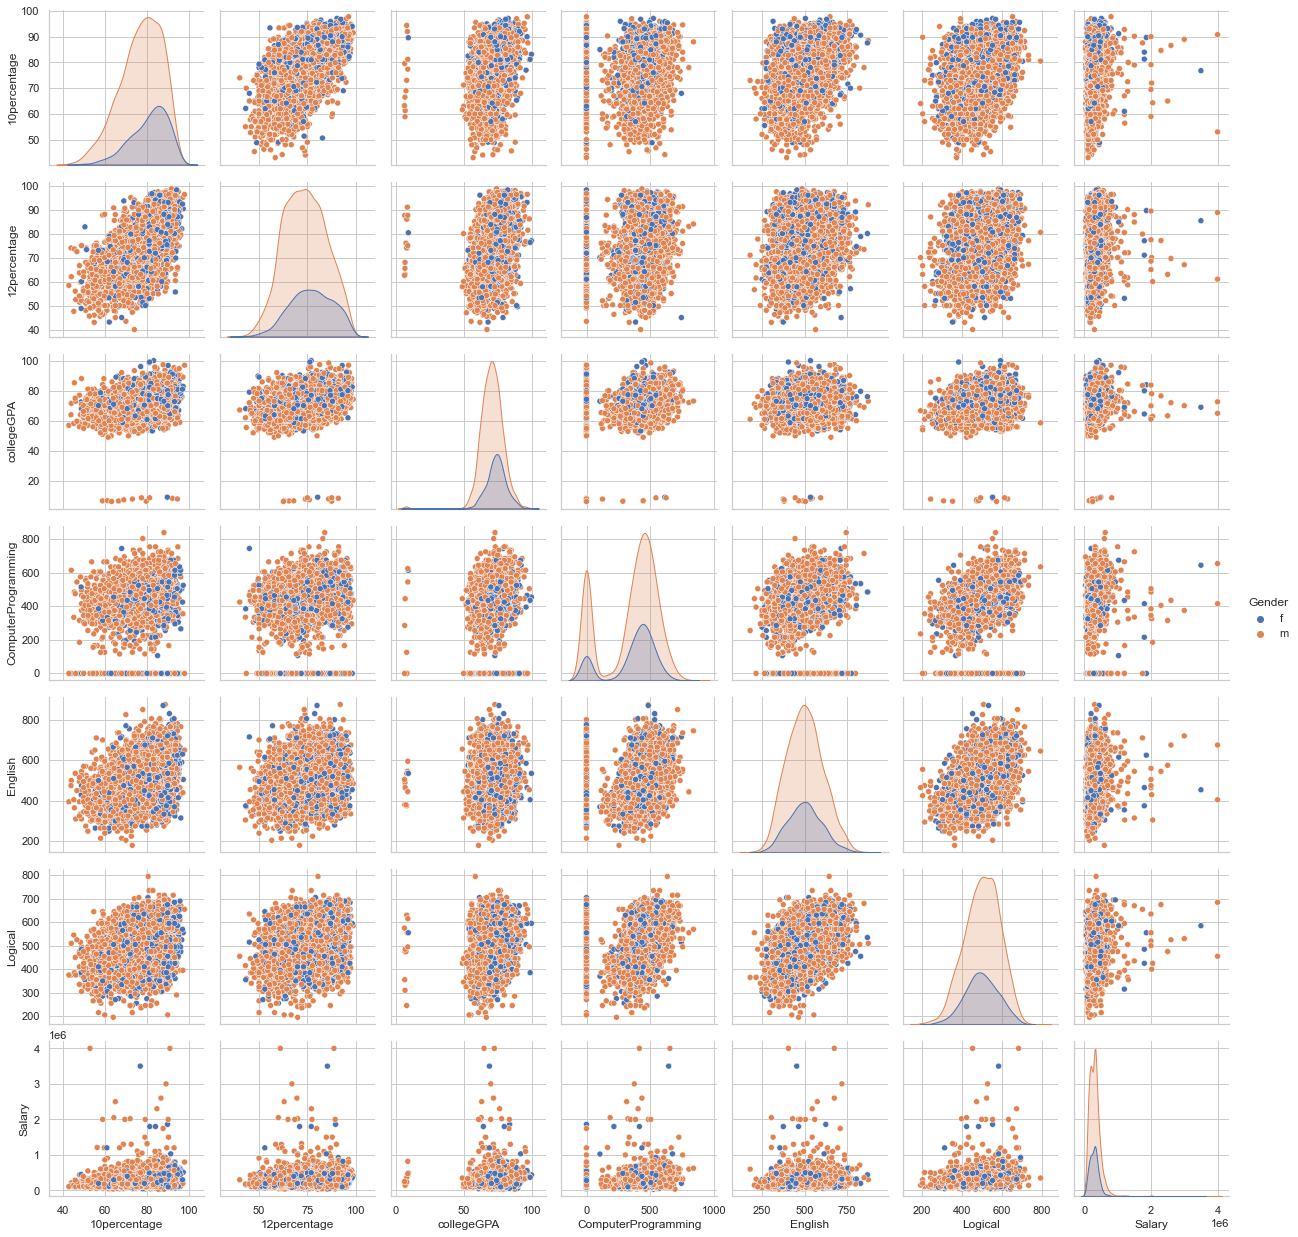

In [96]:
df = data[['Gender','10percentage','12percentage','collegeGPA','ComputerProgramming','English', 'Logical','Salary']]
sns.pairplot(df,hue='Gender')

<h6>Patterns between categorical and numerical columns using swarmplot, barplot</h6>

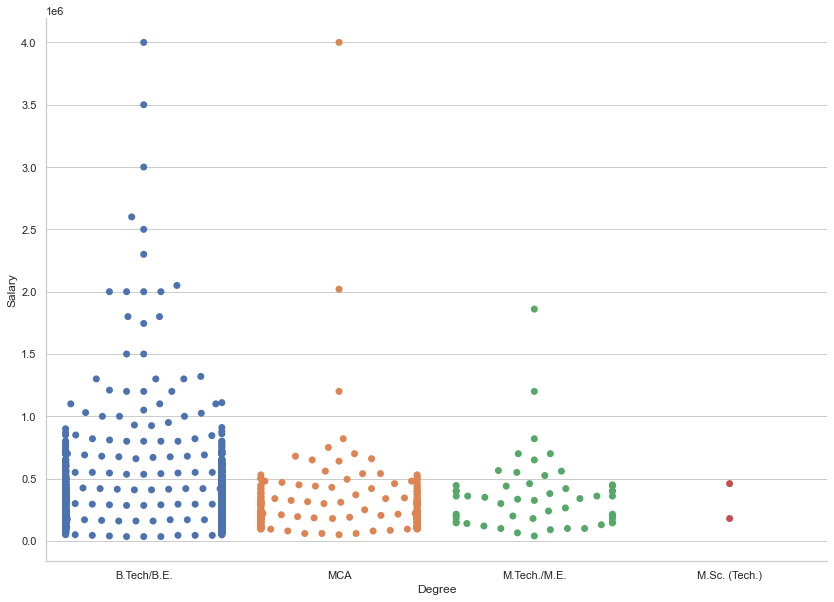

In [97]:
g = sns.swarmplot(y = "Salary",
              x = 'Degree',
              data = data,
              # Decrease the size of the points to avoid crowding
              size = 7)
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(14,10)
plt.show()

<h6>Graduteds from Btech has higher chances of a getting a job with higher salaries</h6>

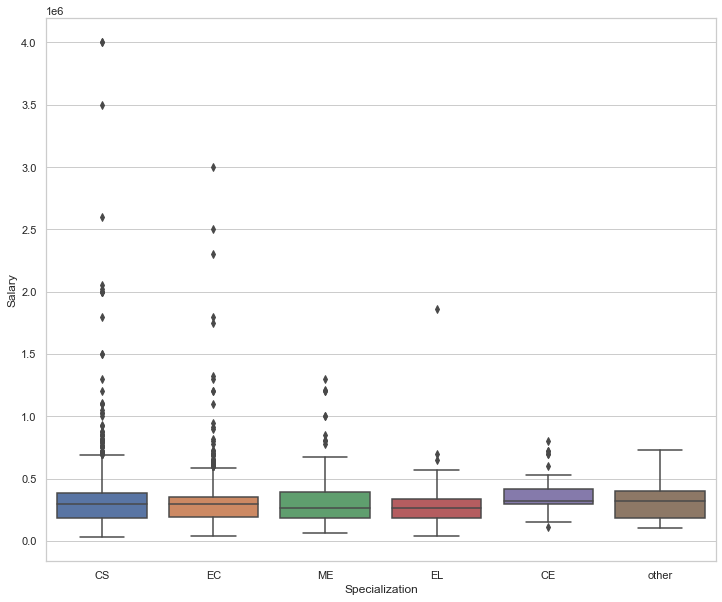

In [98]:
g = sns.boxplot(y = "Salary",
              x = 'Specialization',
              data = data)

g.figure.set_size_inches(12,10)
plt.show()

<h6>Gradutes With Specilization in CS has higher chances to get more salary</h6>

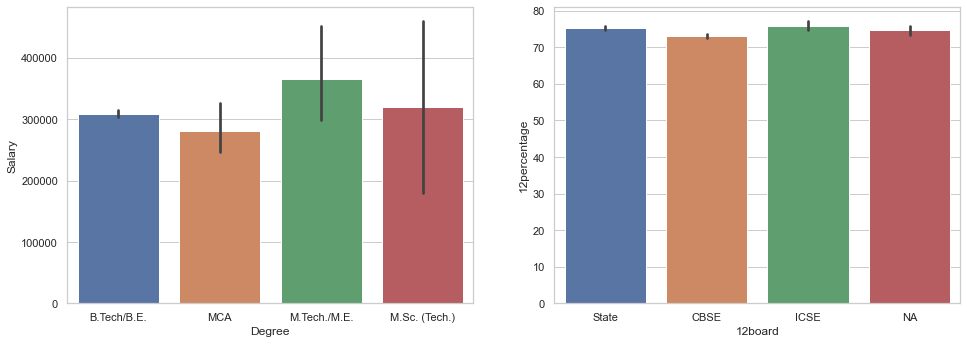

In [99]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.barplot(y='Salary',x='Degree',data=data);

plt.subplot(2,2,2)
sns.barplot(y='12percentage',x='12board',data=data);

<h6>Observations : </h6>
<ul>
<h6>Gradutes who has done Masters has higher salaries</h6>
<h6>Students from ICSE has higher percentages</h6>

In [139]:
#data['JobCity'].value_counts()

<h6>Relationship Between Gender and Specialisation</h6>

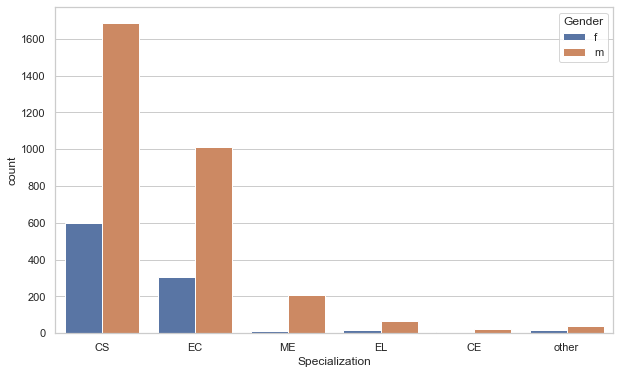

In [100]:
plt.figure(figsize=(10,6))
sns.countplot(x='Specialization',hue='Gender',orient='v',data=data);

<h6> We can observe the female taking core branches such as Mechanical Electrical and Civil are very less</h6>
<br>
Funny Note : A Well Known fact , Mecahnical and Civil Boys Knows that Pain

## Hypothesis Testing : 
---
<h6>Times of India article dated Jan 18, 2019 states that After doing your CS Engineering
<h6>If you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer <h6>you can earn up to 2.5-3 lakhs as a fresh
graduate.</h6>

#### Step - 1:
<ul>
    <li>"Null Hypothesis (Status Quo): $$ H_0: \ \text{Average Salary}: \  \mu > 3 Lakhs $$ 
    <li>"Alternate Hypothesis (Bold Claim): $$ H_1: \ \text{Average Salary}:  \ \mu \ \neq 3 Lakhs $$

#### Step - 2:
<b><ul><li> Collect the Sample of size of $\ n $
    <li> Complute the Mean from this sample $ \ \bar{X} $

In [146]:
#Collecting sample from our dataset
df1 = data[data['Specialization'] == 'CS'] #Students who have taken Computer Science Engineering
df2= df1[df1['DOJAge']==df1['GradAge']] #Students who has oined as fresher
df3= df2.sample(n=20)
df3['Salary']

ID
1230264    320000
982461     275000
905258     325000
530470     275000
1202809    200000
732482     300000
530430     300000
924141     200000
336787     385000
553381     325000
360581     155000
666201     325000
801323     350000
343644     105000
669240     280000
1081171    325000
214343     350000
473243     300000
1043810    120000
613031     350000
Name: Salary, dtype: int64

In [147]:
#Convertng lacs into simple values
sample=[5.5,2,2.4,1.8,3.4,1.2,3.25,2.5,0.85,3.4,2.6,2.2,3.6,1.05,0.95,3.3,3.15,4.1,4.5,2.75]

#### Step-3 : Compute  Test Statistic 
<b><li>If population Standard deviation $(\sigma)$ is unknown then we can sample standard deviation $(s)$ and calculate t-score;
    $$ \text{t =}\ \frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}    $$
    <li>where, $$ s = \sqrt\frac{\sum({x-\bar{x})^{2}}}{n-1}$$

In [148]:
sample_size = 20
sample_mean=sum(sample)/len(sample)
sample_std=np.std(sample)
pop_mean = 3 #3 lacs

In [155]:
#User Defined Function For T-Score
def t_score(sample_mean,sample_size,pop_mean,sample_std):
    numerator = sample_mean - pop_mean
    denominator = sample_std/(sample_size)**0.5
    return numerator/denominator

In [157]:
t = t_score(sample_size,sample_mean,pop_mean,sample_std)
print(t)

23.372545944502054


#### Step-4 : Decide $\alpha$ 

In [158]:
from scipy.stats import norm, t
from math import sqrt
#  One tail test with 95% of confidence
alpha = 1 - 0.95
t_critical = t.ppf(1 - alpha, df = 19)
print("t_critical Value :",t_critical)

t_critical Value : 1.729132811521367


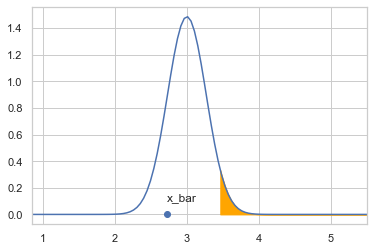

In [160]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = min(sample)
x_max =max(sample)


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))
plt.show()

In [165]:
# Conclusion of this t test
t=23.37
if (t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [166]:
# Conclusion using p value
p_value = 2 * (1.0 - norm.cdf(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0
Reject Null Hypothesis


<h6>From both T test and P test We are failed to accept the null hypotheseis of TOI</h6>

<h5> Corealtion using Heat Map </h5>

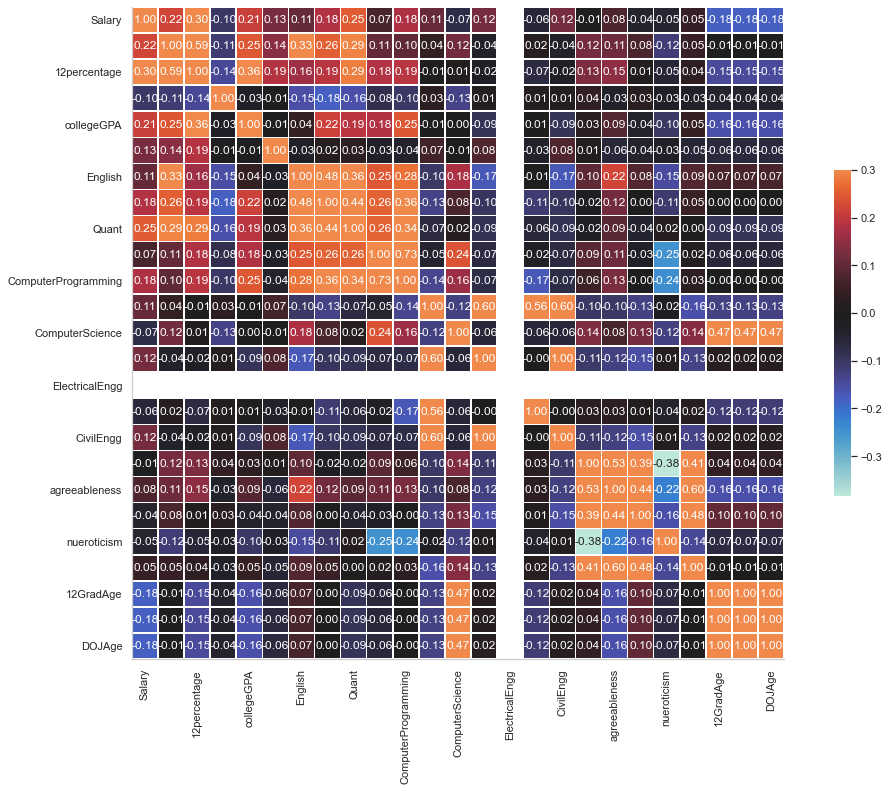

In [167]:
df4=data[numeric_list]
corr = df2.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='icefire')
sns.despine()
g.figure.set_size_inches(18,12)

plt.show()

<h2>CONCLUSION</h2>

<h6>After this EDA (Both Statastical and Visulizations) I have concluded that 
$ / $
    <ul>
        <li>Many of the students who graduated with computer science degree and who has done masters are getting good salary irrespective to the gender. 
$  $
        <li>Also we can observe that most of the jobs are in bangalore because as we all know Banglore is IT Hub.</li>

# Performing Feature Transformation

In [168]:
#One_Hot Encoding
for feature in category_list:
    clean_data = pd.get_dummies(data, prefix=feature, columns=[feature])

In [171]:
clean_data.head()

,Salary,DOL,Designation,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,collegeGPA,CollegeCityTier,CollegeState,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,12GradAge,GradAge,DOJAge,Specialization_CE,Specialization_CS,Specialization_EC,Specialization_EL,Specialization_ME,Specialization_other
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
203097,420000,present,senior quality engineer,Bangalore,f,84.3,"board ofsecondary education,ap",95.8,State,2,B.Tech/B.E.,78.00,0,Andhra Pradesh,515,585,525,0.636,445,-1,-1,-1,-1,-1,-1,0.974,0.813,0.527,1.355,-0.446,20,20,22,0,1,0,0,0,0
579905,500000,present,assistant manager,Indore,m,85.4,cbse,85.0,CBSE,2,B.Tech/B.E.,70.06,0,Madhya Pradesh,695,610,780,0.961,-1,466,-1,-1,-1,-1,-1,-0.734,0.379,1.240,-0.108,0.864,19,19,24,0,0,1,0,0,0
810601,325000,present,systems engineer,Chennai,f,85.0,cbse,68.2,CBSE,2,B.Tech/B.E.,70.00,0,Uttar Pradesh,615,545,370,0.451,395,-1,-1,-1,-1,-1,-1,0.272,1.711,0.164,-0.868,0.672,22,22,22,0,1,0,0,0,0
267447,1100000,present,senior software engineer,Gurgaon,m,85.6,cbse,83.6,CBSE,1,B.Tech/B.E.,74.64,1,Delhi,635,585,625,0.974,615,-1,-1,-1,-1,-1,-1,0.046,0.345,-0.344,-0.408,-0.919,19,19,22,0,1,0,0,0,0
343523,200000,2015-03-01 00:00:00,get,Manesar,m,78.0,cbse,76.8,CBSE,2,B.Tech/B.E.,73.90,0,Uttar Pradesh,545,625,465,0.125,-1,233,-1,-1,-1,-1,-1,-0.881,-0.279,-1.070,0.092,-0.130,21,21,23,0,0,1,0,0,0


In [ ]:
clean_data.drop(columns=['DOL', 'Designation', 'JobCity','CollegeTier',  
       'CollegeCityTier', '10board','CollegeState','ElectronicsAndSemicon',
        'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg'],axis=1,inplace=True)

In [174]:
clean_data.head()

,Salary,Gender,10percentage,12percentage,12board,Degree,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,12GradAge,GradAge,DOJAge,Specialization_CE,Specialization_CS,Specialization_EC,Specialization_EL,Specialization_ME,Specialization_other
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
203097,420000,f,84.3,95.8,State,B.Tech/B.E.,78.00,515,585,525,0.636,445,-1,0.974,0.813,0.527,1.355,-0.446,20,20,22,0,1,0,0,0,0
579905,500000,m,85.4,85.0,CBSE,B.Tech/B.E.,70.06,695,610,780,0.961,-1,-1,-0.734,0.379,1.240,-0.108,0.864,19,19,24,0,0,1,0,0,0
810601,325000,f,85.0,68.2,CBSE,B.Tech/B.E.,70.00,615,545,370,0.451,395,-1,0.272,1.711,0.164,-0.868,0.672,22,22,22,0,1,0,0,0,0
267447,1100000,m,85.6,83.6,CBSE,B.Tech/B.E.,74.64,635,585,625,0.974,615,-1,0.046,0.345,-0.344,-0.408,-0.919,19,19,22,0,1,0,0,0,0
343523,200000,m,78.0,76.8,CBSE,B.Tech/B.E.,73.90,545,625,465,0.125,-1,-1,-0.881,-0.279,-1.070,0.092,-0.130,21,21,23,0,0,1,0,0,0


In [181]:
#Label Encoding Our Binary Feature (Gender)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
clean_data["Gender_Encoded"]=le.fit_transform(clean_data['Gender'])

In [183]:
clean_data.drop('Gender',axis=1,inplace=True)

In [188]:
clean_data.head()

,Salary,10percentage,12percentage,12board,Degree,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,12GradAge,GradAge,DOJAge,Specialization_CE,Specialization_CS,Specialization_EC,Specialization_EL,Specialization_ME,Specialization_other,Gender_Encoded
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
203097,420000,84.3,95.8,State,B.Tech/B.E.,78.00,515,585,525,0.636,445,-1,0.974,0.813,0.527,1.355,-0.446,20,20,22,0,1,0,0,0,0,0
579905,500000,85.4,85.0,CBSE,B.Tech/B.E.,70.06,695,610,780,0.961,-1,-1,-0.734,0.379,1.240,-0.108,0.864,19,19,24,0,0,1,0,0,0,1
810601,325000,85.0,68.2,CBSE,B.Tech/B.E.,70.00,615,545,370,0.451,395,-1,0.272,1.711,0.164,-0.868,0.672,22,22,22,0,1,0,0,0,0,0
267447,1100000,85.6,83.6,CBSE,B.Tech/B.E.,74.64,635,585,625,0.974,615,-1,0.046,0.345,-0.344,-0.408,-0.919,19,19,22,0,1,0,0,0,0,1
343523,200000,78.0,76.8,CBSE,B.Tech/B.E.,73.90,545,625,465,0.125,-1,-1,-0.881,-0.279,-1.070,0.092,-0.130,21,21,23,0,0,1,0,0,0,1


In [192]:
#labeling Bins
bin_labels_3 = ['Low', 'Avg', 'High']
clean_data['Salary'] = pd.qcut(data['Salary'],
                              q=[0, 1/3, 2/3, 1], #explicitly defined the range of quantiles to use
                              labels=bin_labels_3)

In [193]:
clean_data.head()

,Salary,10percentage,12percentage,12board,Degree,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,12GradAge,GradAge,DOJAge,Specialization_CE,Specialization_CS,Specialization_EC,Specialization_EL,Specialization_ME,Specialization_other,Gender_Encoded
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
203097,High,84.3,95.8,State,B.Tech/B.E.,78.00,515,585,525,0.636,445,-1,0.974,0.813,0.527,1.355,-0.446,20,20,22,0,1,0,0,0,0,0
579905,High,85.4,85.0,CBSE,B.Tech/B.E.,70.06,695,610,780,0.961,-1,-1,-0.734,0.379,1.240,-0.108,0.864,19,19,24,0,0,1,0,0,0,1
810601,Avg,85.0,68.2,CBSE,B.Tech/B.E.,70.00,615,545,370,0.451,395,-1,0.272,1.711,0.164,-0.868,0.672,22,22,22,0,1,0,0,0,0,0
267447,High,85.6,83.6,CBSE,B.Tech/B.E.,74.64,635,585,625,0.974,615,-1,0.046,0.345,-0.344,-0.408,-0.919,19,19,22,0,1,0,0,0,0,1
343523,Low,78.0,76.8,CBSE,B.Tech/B.E.,73.90,545,625,465,0.125,-1,-1,-0.881,-0.279,-1.070,0.092,-0.130,21,21,23,0,0,1,0,0,0,1


#### Standardization

In [194]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(numeric_features)

StandardScaler()

In [198]:
numeric_features_2 = scaler.fit_transform(numeric_features)
numeric_features_2 = pd.DataFrame(numeric_features_2, columns=numeric_features.columns)
numeric_features_2.head()

,Salary,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,12GradAge,GradAge,DOJAge
0,0.528,0.647,1.940,0.283,0.798,-0.655,0.127,0.961,0.095,0.268,0.448,-0.609,-0.523,-0.244,-0.2,-0.313,-0.101,0.983,0.708,0.551,1.513,-0.305,-0.242,-0.242,-0.449
1,0.904,0.759,0.958,0.283,-0.175,-0.655,1.843,1.249,2.180,0.961,-1.725,2.343,-0.523,-0.244,-0.2,-0.313,-0.101,-0.676,0.247,1.300,0.061,0.994,-0.808,-0.808,1.021
2,0.081,0.718,-0.570,0.283,-0.182,-0.655,1.080,0.500,-1.172,-0.127,0.204,-0.609,-0.523,-0.244,-0.2,-0.313,-0.101,0.301,1.661,0.169,-0.694,0.804,0.890,0.890,-0.449
3,3.725,0.779,0.830,-3.530,0.386,1.526,1.271,0.961,0.913,0.990,1.275,-0.609,-0.523,-0.244,-0.2,-0.313,-0.101,0.082,0.211,-0.364,-0.237,-0.775,-0.808,-0.808,-0.449
4,-0.506,0.008,0.212,0.283,0.296,-0.655,0.413,1.422,-0.396,-0.824,-1.725,0.870,-0.523,-0.244,-0.2,-0.313,-0.101,-0.820,-0.452,-1.127,0.259,0.009,0.324,0.324,0.286


###  $$ \underline{END} $$